In [1]:
import pandas as pd
import numpy as np
import struct
import glob
import os
import cv2
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
from PIL import Image

In [3]:
import warnings
warnings.simplefilter("ignore", FutureWarning)

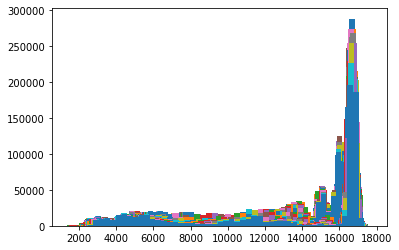

In [12]:
#for a group of files:
#reading from set and saving to raw_inputs folder
i=1
filepath =r"C:\Users\Harini Pravin\Downloads\Disior\set1"
list_of_files = glob.glob(os.path.join(filepath,'*.raw'))
for file_name in list_of_files: 
        with open(file_name, "rb") as f:
            fileContent = f.read()
            im = struct.unpack("H" * (len(fileContent)//2), fileContent)
            im = np.reshape(im, (748,940))
            plt.hist(im.ravel(),bins=50)
            im = Image.fromarray(np.uint16(im))
            im.save(r"C:\Users\Harini Pravin\Downloads\Disior\raw_input3\input"+str(i)+".png")
            i=i+1

In [4]:
from skimage.transform import rotate,rescale,resize
from skimage.exposure import equalize_adapthist,adjust_gamma
from skimage.color import rgb2gray,gray2rgb
from skimage import util
from skimage.restoration import denoise_wavelet

In [10]:
#defining a function to enhance the raw_inputs
def enhance_img(in_img):
    img_rszd = resize(in_img,(940,748),anti_aliasing=True)
    #img_rote = rotate(img_rszd,-180) 
    img_grayscale = gray2rgb(img_rszd)
    inverted_img = util.invert(img_grayscale)
    #gamma_img = adjust_gamma(img_grayscale, gamma=1, gain=1)
    img_mod = equalize_adapthist(inverted_img,clip_limit=0.03)
    img_final= denoise_wavelet(img_mod, multichannel=True, rescale_sigma=True)
    return img_final

In [13]:
#reading raw images,pre-enhancement and saving to final_inputs folder
n=1
filepath =r"C:\Users\Harini Pravin\Downloads\Disior\raw_input2"
list_of_files = glob.glob(os.path.join(filepath,'*.png'))
for file_name in list_of_files: 
    test_img = cv2.imread(file_name)
    target = enhance_img(test_img)
    #cv2.imshow('image',final_input)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    cv2.imwrite(r"C:\Users\Harini Pravin\Downloads\Disior\tt_images\target"+str(n)+".png",target*255)
    n=n+1
    #final_input = Image.fromarray(np.uint16(final_input))
    #final_input.save(r"C:\Users\Harini Pravin\Downloads\Disior\final_inputs\final_input"+str(n)+".png")
        